In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.make_dataset import load_dossies_df
from src.data.make_metadados import load_dossies_metadados_df
from src.features.build_features import get_tfidf_features
from src.models import train_model, predict_model
from src.visualization.visualize import plot_dendrogram_Agglomerative, plot_dendrogram

In [3]:
dossies = load_dossies_df(size=50)
dossies.head()

,file,text
0,116.txt,escargot rede tecnologia desenvolvimento postu...
1,31.txt,conservação rede tecnologia classificação cons...
2,6116.txt,fabricação instituto tecnologia paraná laminaç...
3,27650.txt,manejo apoio desenvolvimento tecnológico manej...
4,27680.txt,a manejo sustentável a atividade artesanato in...


In [4]:
dossies_metadados = load_dossies_metadados_df(dossies.file, ['titulo', 'palavras_chave', 'categoria'])
dossies_metadados.head()

,titulo,palavras_chave,categoria
0,Criação de escargot,"[Caracol, criação, comestível, escargot, f...","[SBRT, AGRICULTURA E PECUÁRIA, Pecuária, Outro..."
1,Pós-colheita e conservação de hortaliças,"[Hortaliça, vegetal, conservação, resfriame...","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
2,Fabricação de bolachas e biscoitos,"[Biscoito, Boas Práticas de Fabricação, BPF,...","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Outros Pro..."
3,Manejo de aves,"[Ave, animal silvestre, fauna silvestre, ma...","[SBRT, AGRICULTURA E PECUÁRIA, Pecuária, Ativi..."
4,Manejo sustentável do capim dourado,"[Agricultura, artesanato, capim-dourado, ma...","[SBRT, PRODUÇÃO FLORESTAL, Florestas Nativas]"


In [5]:
X = get_tfidf_features(dossies.text)
X.shape

(50, 2975)

In [27]:
aggl_clustering = train_model.agglomerative(X, distance_threshold=0, n_clusters=None, linkage='complete')
aggl_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

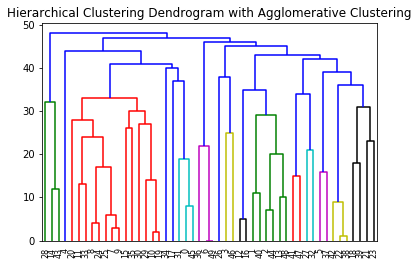

In [28]:
plot_dendrogram_Agglomerative(aggl_clustering)

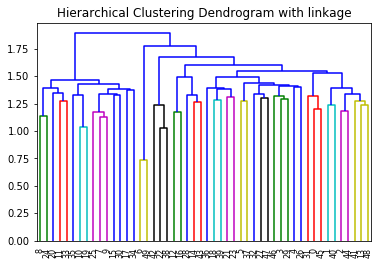

In [16]:
plot_dendrogram(X, method='ward')

In [29]:
[c for c in dossies_metadados.loc[[1,40]].categoria]

[['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Horticultura'],
 ['SBRT',
  'INDÚSTRIAS DE TRANSFORMAÇÃO',
  'Alimentos e Bebidas',
  'Abate e produtos de carne']]